<a href="https://colab.research.google.com/github/Sittipark/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Understanding**

In [1]:
# Import Library ที่ใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**ทำความเข้าใจองค์ประกอบของข้อมูลที่ได้มา**

**Data Dictionary :**

Information about dataset attributes
- **Pregnancies:** To express the Number of pregnancies
- **Glucose:** To express the Glucose level in blood
- **BloodPressure:** To express the Blood pressure measurement
- **SkinThickness:** To express the thickness of the skin
- **Insulin:** To express the Insulin level in blood
- **BMI:** To express the Body mass index
- **DiabetesPedigreeFunction:** To express the Diabetes percentage
- **Age:** To express the age
- **Outcome:** To express the final result 1 is Yes and 0 is No (คำตอบของ dataset)

In [2]:
# 1.1
# นำเข้า dataset
original_data = pd.read_csv("diabetes.csv")

In [3]:
# 1.2
# สร้างตัวแปรมารับ copy ของข้อมูล เพื่อสำรองข้อมูล
df = original_data.copy()

## **Data Exploration**

### **View info and samples of data**

In [4]:
# 2.1
# ดู information ของ dataset
# index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 2.2
# shape ของข้อมูล (row, column)
df.shape

(768, 9)

In [6]:
# 2.3
# ดูข้อมูล 5 แถวแรก
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 2.4
# ดูข้อมูล 5 แถว สุดท้าย
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# 2.5
# sample มา 5 row ตัวอย่าง
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
580,0,151,90,46,0,42.1,0.371,21,1
661,1,199,76,43,0,42.9,1.394,22,1
173,1,79,60,42,48,43.5,0.678,23,0
310,6,80,66,30,0,26.2,0.313,41,0
262,4,95,70,32,0,32.1,0.612,24,0


### **Descriptive Statistics**

In [9]:
# 3.1
# ดูค่าทางสถิติต่าง ๆ ของข้อมูล (mean, max, min. etc.)
df.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# 3.2
# ดูจำนวนของข้อมูลที่แตกต่างกัน
df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [11]:
# 3.3
# ดูข้อมูลที่แตกต่างกัน
pd.unique(df["Pregnancies"])

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

### **Bar plot**
ดูจำนวนของ column Outcome ว่ามีจำนวนเท่าไร ด้วยการใช้ bar plot

In [12]:
# 4.1
# ดูจำนวนของแต่ละตัวใน Outcome
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


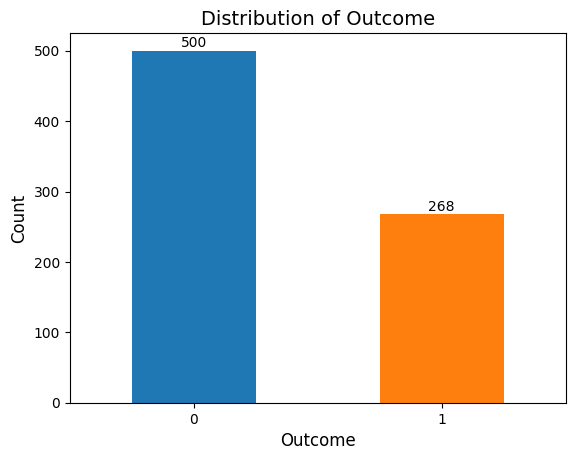

In [13]:
# 4.2
# ทำการ plot bar เพื่อให้เห็นภาพชัดขึ้น

colors = ['#1f77b4', '#ff7f0e']
plt.figure()
ax = df['Outcome'].value_counts().plot(kind='bar', color=colors)

# Set the title and labels
plt.title('Distribution of Outcome', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add the count values on top of each bar
for index, value in enumerate(df['Outcome'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Rotate the x-axis labels (if needed, 360 is the default position)
plt.xticks(rotation=360)

plt.show()

### **Histogram**
- ดูการกระจายตัวของ Feature ต่าง ๆ

In [14]:
# 5.1
# column อื่นที่ไม่ใช่ Outcome
features = df.columns[:-1]
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

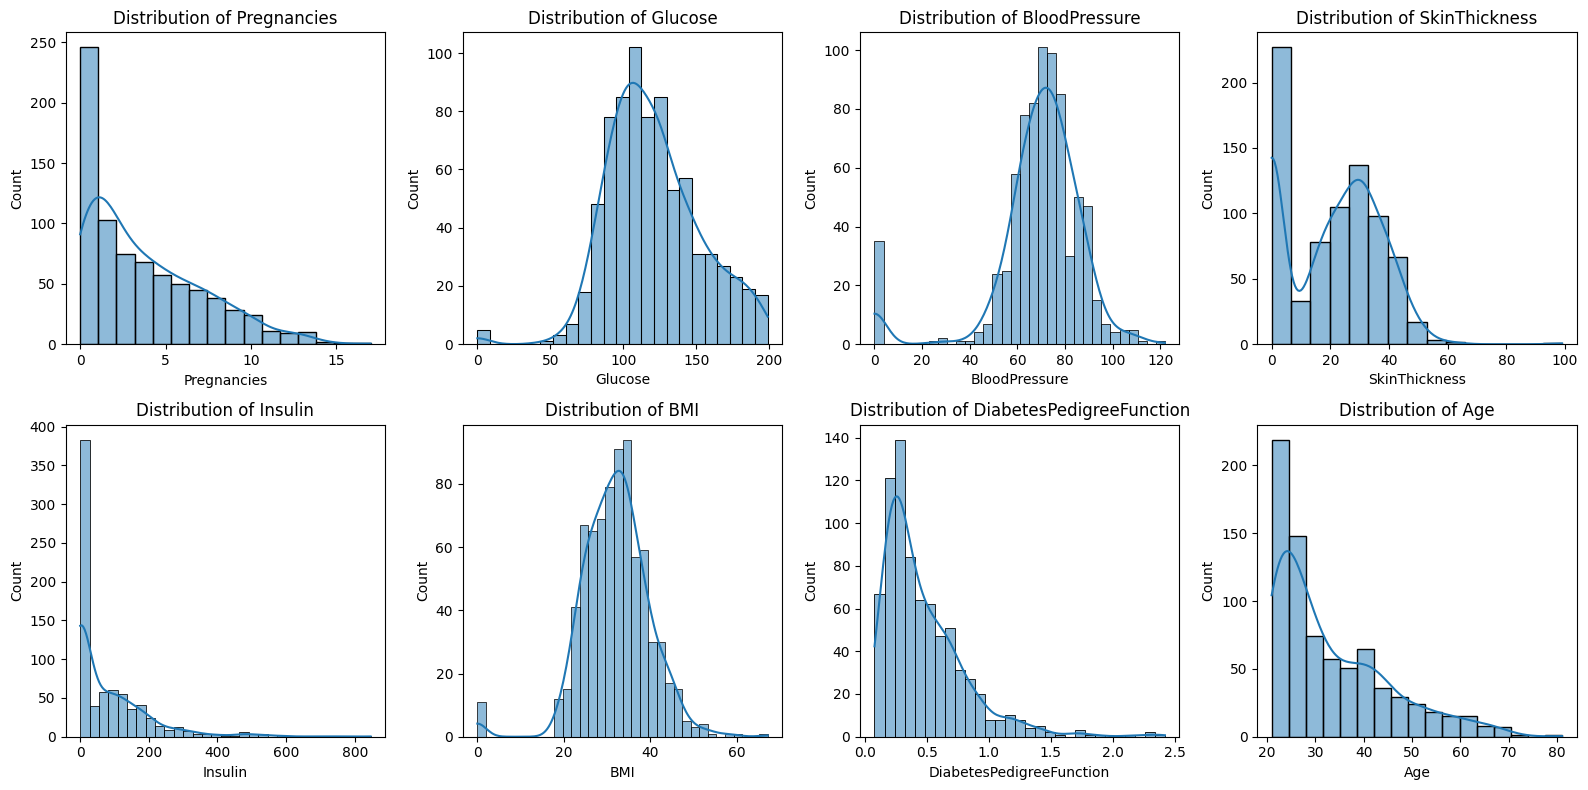

In [15]:
# 5.2
plt.figure(figsize=(16, 8))
for i, col in enumerate(features):
    # the figure has 2 row, 4 columns, and this plot is the i plot.
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')#จำนวนของค่านั้นๆ
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [16]:
#ดูว่าข้อมูลต่างกันมาเท่าไหร่ (หากมีค่าเข้าใกล้ 0 คือไม่ค่อยต่างกัน)
df.std()

,0
Pregnancies,3.369578
Glucose,31.972618
BloodPressure,19.355807
SkinThickness,15.952218
Insulin,115.244002
BMI,7.884160
DiabetesPedigreeFunction,0.331329
Age,11.760232
Outcome,0.476951


### **Boxenplot**
- ดู Outliers ของข้อมูล

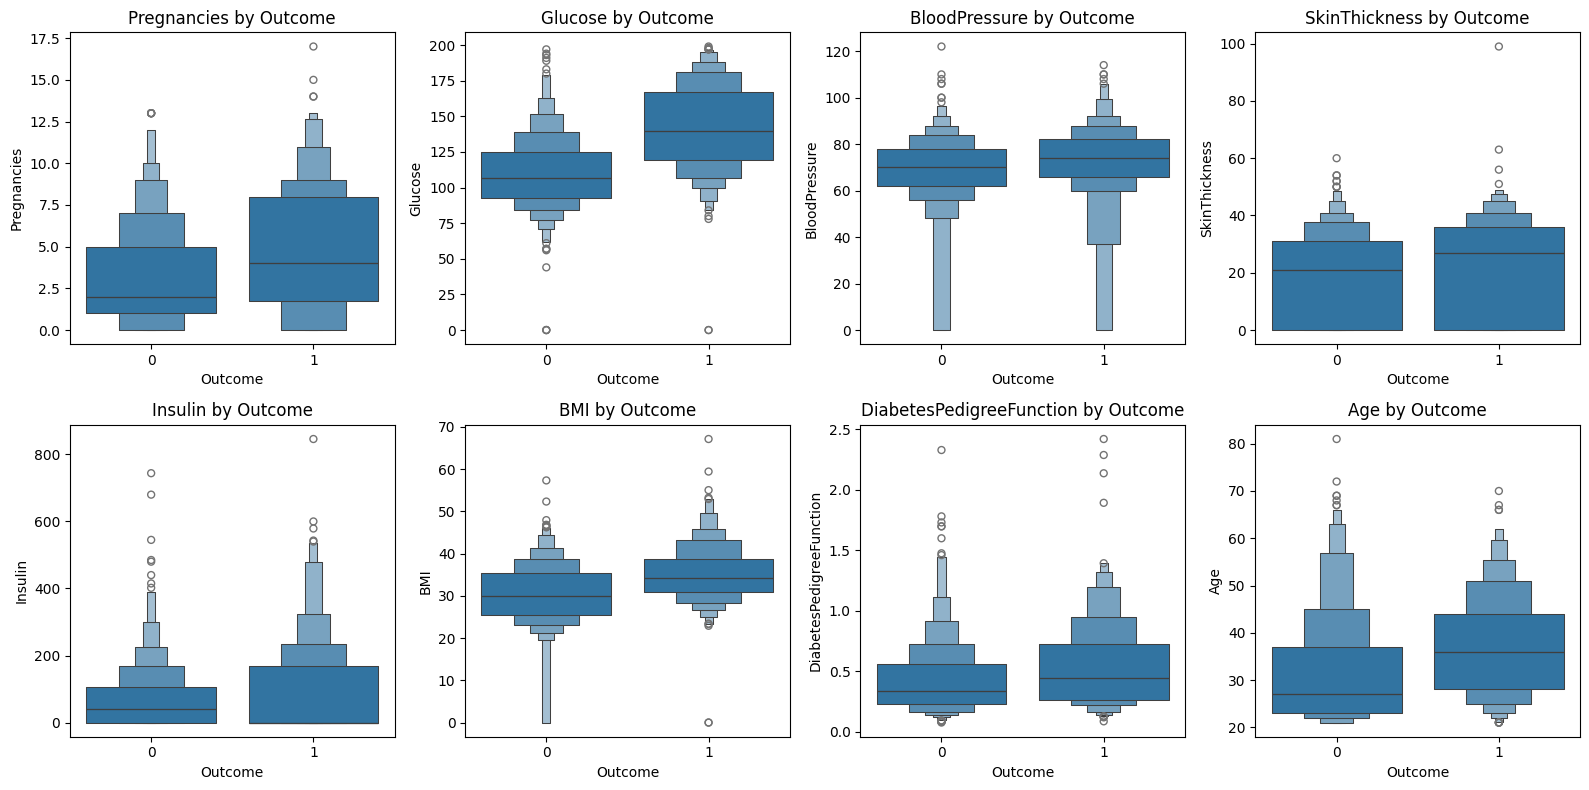

In [17]:
# 6.1
# plot boxplotของแต่ละ column ระหว่างคนที่เป็นเบาหวานและไม่ได้เป็น
plt.figure(figsize = (16, 8))
columns = df.columns[:-1]

for i, col in enumerate(columns):
    plt.subplot(2, 4, i + 1)
    sns.boxenplot(x = df['Outcome'], y = df[col])
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.title(f'{col} by Outcome')

plt.tight_layout()
plt.show()

### **Correlation**

In [18]:
# 7.1
# ค่าสหสัมพันธ์; ตัวเลขแสดงอิทธิพลที่มีต่อกันระหว่างแต่ละ column
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

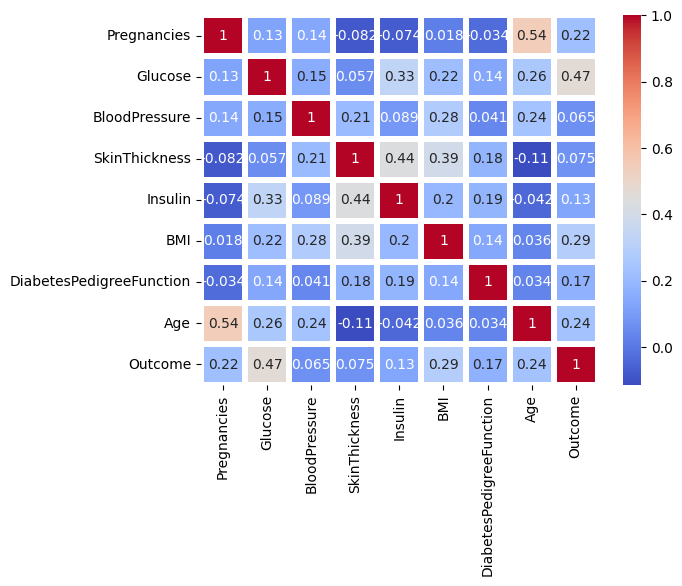

In [19]:
# 7.2
# heatmap เพื่อให้เห็นภาพชัดเจนขึ้น
# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'magma')
sns.heatmap(corr, annot = True, fmt = '0.2g', linewidths = 4, cmap = "coolwarm")

## **Data Preparation**

In [20]:
# ภาพรวมของข้อมูล
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Missing value**

In [21]:
# 8.1
# ตรวจสอบว่ามี missing value หรือไม่
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### **Data inconsistency**

In [22]:
# 8.2
# ในบาง column ที่ค่าต่ำสุดไม่สามารถเป็น 0 ได้ เช่น ความดันเลือด อาจสื่อความหมายคล้ายว่าเป็น missing value
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [23]:
# 8.3
# เปลี่ยน 0 ให้เป็น NaN เพื่อใช้ .isnull() ในการตรวจสอบ
df[zero_columns] = df[zero_columns].replace(0, np.NaN)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
# 8.4
# แทนค่าว่างเป็นค่า median
for col in zero_columns:
    df[col].fillna(df[col].median(), inplace=True)

df.isna().sum()

<ipython-input-24-3b3204a5d2ef>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [25]:
# 8.5
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Check Duplicated**

In [26]:
# 9.1
# check ว่าแต่ละแถวมีค่าที่เหมือนกันหรือซ้ำกันหรือไม่
df.duplicated().sum()

0

### **Outlier**

In [27]:
# 10.1
# Outlier Analysis
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier_count(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    return outliers.shape[0]

def outlier_counts():
    counts = {}
    for col in df.iloc[:, :-1]:
        counts[col] = check_outlier_count(df, col)
    print(counts)

In [28]:
# 10.2
print('จำนวนของ Outlier ในแต่ละ Column')
outlier_counts()

จำนวนของ Outlier ในแต่ละ Column
{'Pregnancies': 4, 'Glucose': 0, 'BloodPressure': 14, 'SkinThickness': 87, 'Insulin': 346, 'BMI': 8, 'DiabetesPedigreeFunction': 29, 'Age': 9}


In [29]:
# 10.3
# We are replacing the outliers according to the IQR method.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in df.iloc[:, :-1]:
    replace_with_thresholds(df, col)

<ipython-input-29-091069dd2a2f>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
<ipython-input-29-091069dd2a2f>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [30]:
# 10.4
# จัดการกับ outlier
print('จำนวนของ Outlier ในแต่ละ Column หลังจากจัดการแล้ว')
outlier_counts()

จำนวนของ Outlier ในแต่ละ Column หลังจากจัดการแล้ว
{'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0}


In [31]:
# 10.5
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.656250,72.358073,28.866536,124.691081,32.393359,0.458914,33.199870,0.348958
std,3.344157,30.438286,11.697097,7.442353,7.913595,6.667471,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,14.500000,112.875000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,42.500000,135.875000,50.250000,1.200000,66.500000,1.000000


### **Feature Engineering (Construct data)**

<Axes: xlabel='Age', ylabel='Count'>

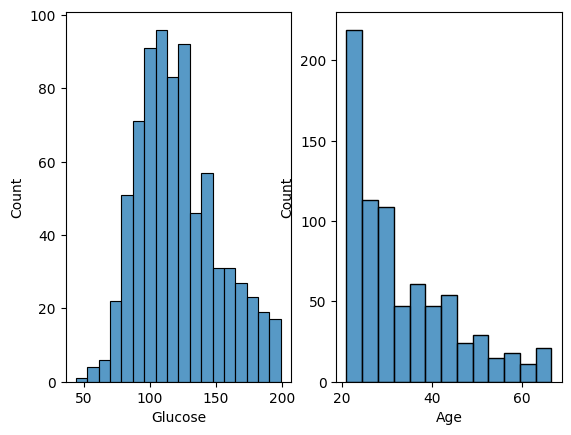

In [32]:
# 11.1
plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'])
plt.subplot(1, 2, 2)
sns.histplot(df['Age'])

In [33]:
# 11.2
# กำหนดระดับของ Glucose
df.loc[(df['Glucose'] < 50), "glucose_level"] = "Low"
df.loc[(df['Glucose'] >= 50) & (df['Glucose'] <= 180), "glucose_level"] = "Normal"
df.loc[(df['Glucose'] > 180), "glucose_level"] = "High"

In [34]:
# 11.3
df.loc[(df['Age'] >= 21) & (df['Age'] <= 50), 'age_cat'] = 'mature'
df.loc[(df['Age'] > 50), 'age_cat'] = 'elder'

In [35]:
# 11.4
df.loc[(df['Glucose'] < 180) & (df['Glucose'] > 50) & (df["Age"] <= 50), "age_gul_cat"] = "normal_mature"
df.loc[(df['Glucose'] < 180) & (df['Glucose'] > 50) & (df["Age"] > 50), "age_gul_cat"] = "normal_elder"
df.loc[((df['Glucose'] >= 180) | (df['Glucose'] < 50)) & (df["Age"] <= 50), "age_gul_cat"] = "at_risk_mature"
df.loc[((df['Glucose'] >= 180) | (df['Glucose'] < 50)) & (df["Age"] > 50), "age_gul_cat"] = "at_risk_elder"

In [36]:
# 11.5
# หลังทำ Feature Engineering : glucose_level, age_cat, age_gul_cat
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_level,age_cat,age_gul_cat
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1,Normal,mature,normal_mature
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0,Normal,mature,normal_mature
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1,High,mature,at_risk_mature
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0,Normal,mature,normal_mature
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1,Normal,mature,normal_mature
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.5,135.875,32.9,0.171,63.0,0,Normal,elder,normal_elder
764,2.0,122.0,70.0,27.0,125.000,36.8,0.340,27.0,0,Normal,mature,normal_mature
765,5.0,121.0,72.0,23.0,112.875,26.2,0.245,30.0,0,Normal,mature,normal_mature
766,1.0,126.0,60.0,29.0,125.000,30.1,0.349,47.0,1,Normal,mature,normal_mature


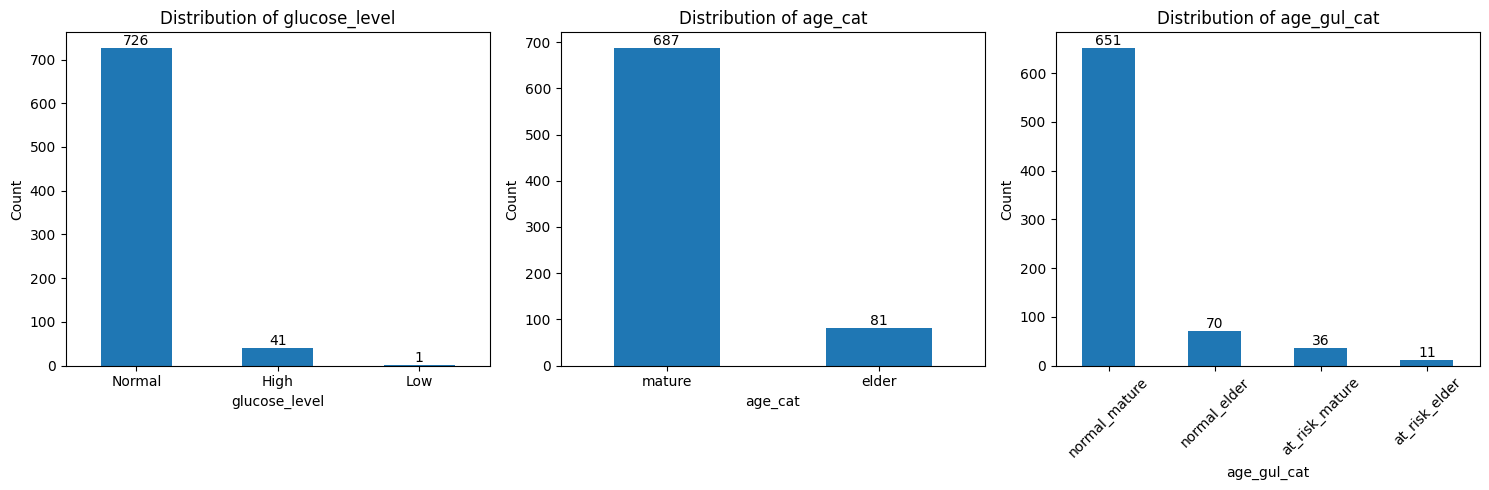

In [37]:
# 11.6

# Create subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

# Plot for glucose_level
ax1 = df['glucose_level'].value_counts().plot(kind='bar', ax = axes[0])
ax1.set_title('Distribution of glucose_level')
ax1.set_xlabel('glucose_level')
ax1.set_ylabel('Count')
for index, value in enumerate(df['glucose_level'].value_counts()):
    ax1.text(index, value, str(value), ha = 'center', va = 'bottom')
ax1.tick_params(axis = 'x', rotation = 360)

# Plot for age_cat
ax2 = df['age_cat'].value_counts().plot(kind = 'bar', ax = axes[1])
ax2.set_title('Distribution of age_cat')
ax2.set_xlabel('age_cat')
ax2.set_ylabel('Count')
for index, value in enumerate(df['age_cat'].value_counts()):
    ax2.text(index, value, str(value), ha = 'center', va = 'bottom')
ax2.tick_params(axis='x', rotation=360)

# Plot for age_gul_cat
ax3 = df['age_gul_cat'].value_counts().plot(kind = 'bar', ax = axes[2])
ax3.set_title('Distribution of age_gul_cat')
ax3.set_xlabel('age_gul_cat')
ax3.set_ylabel('Count')
for index, value in enumerate(df['age_gul_cat'].value_counts()):
    ax3.text(index, value, str(value), ha='center', va='bottom')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **One-Hot Encoding**

In [38]:
# 12.1
# column ที่จะทำ One-hot
cat_col = ['glucose_level', 'age_gul_cat', 'age_cat']

In [39]:
# 12.2
df[cat_col].nunique()

,0
glucose_level,3
age_gul_cat,4
age_cat,2


In [40]:
# 12.3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   glucose_level             768 non-null    object 
 10  age_cat                   768 non-null    object 
 11  age_gul_cat               768 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 72.1+ KB


In [41]:
# 12.4
# เปลี่ยน data type ให้เป็น category
df[cat_col] = df[cat_col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    int64   
 9   glucose_level             768 non-null    category
 10  age_cat                   768 non-null    category
 11  age_gul_cat               768 non-null    category
dtypes: category(3), float64(8), int64(1)
memory usage: 56.8 KB


In [42]:
# 12.5
# ทำการ Encoding
df_dummy = pd.get_dummies(df, dtype = int)
df_dummy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_level_High,glucose_level_Low,glucose_level_Normal,age_cat_elder,age_cat_mature,age_gul_cat_at_risk_elder,age_gul_cat_at_risk_mature,age_gul_cat_normal_elder,age_gul_cat_normal_mature
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1,0,0,1,0,1,0,0,0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0,0,0,1,0,1,0,0,0,1
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1,1,0,0,0,1,0,1,0,0
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0,0,0,1,0,1,0,0,0,1
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1,0,0,1,0,1,0,0,0,1


### **Scaling**

In [43]:
# 13.1
from sklearn.preprocessing import MinMaxScaler

In [44]:
# 13.2
# เลือก scale ใน column ที่เป็นตัวเลข
X_scaled = MinMaxScaler().fit_transform(df_dummy.iloc[:, 0:8])
df_dummy.iloc[:, 0:8] = pd.DataFrame(X_scaled, columns=df_dummy.iloc[:, 0:8].columns)

In [45]:
# 13.3
df_dummy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_level_High,glucose_level_Low,glucose_level_Normal,age_cat_elder,age_cat_mature,age_gul_cat_at_risk_elder,age_gul_cat_at_risk_mature,age_gul_cat_normal_elder,age_gul_cat_normal_mature
0,0.444444,0.670968,0.50000,0.732143,0.527174,0.480499,0.489305,0.637363,1,0,0,1,0,1,0,0,0,1
1,0.074074,0.264516,0.40625,0.517857,0.527174,0.262090,0.243316,0.219780,0,0,0,1,0,1,0,0,0,1
2,0.592593,0.896774,0.37500,0.517857,0.527174,0.159126,0.529412,0.241758,1,1,0,0,0,1,0,1,0,0
3,0.074074,0.290323,0.40625,0.303571,0.000000,0.308892,0.079323,0.000000,0,0,0,1,0,1,0,0,0,1
4,0.000000,0.600000,0.00000,0.732143,1.000000,0.776911,1.000000,0.263736,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.740741,0.367742,0.56250,1.000000,1.000000,0.458658,0.082888,0.923077,0,0,0,1,1,0,0,0,1,0
764,0.148148,0.503226,0.46875,0.446429,0.527174,0.580343,0.233512,0.131868,0,0,0,1,0,1,0,0,0,1
765,0.370370,0.496774,0.50000,0.303571,0.000000,0.249610,0.148841,0.197802,0,0,0,1,0,1,0,0,0,1
766,0.074074,0.529032,0.31250,0.517857,0.527174,0.371295,0.241533,0.571429,1,0,0,1,0,1,0,0,0,1


### **Train-Test Split**

In [46]:
# 14.1

from sklearn.model_selection import train_test_split

y = df_dummy["Outcome"]
x = df_dummy.drop(columns=["Outcome"])  # Dropping the target variable from the features

train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# 14.2
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucose_level_High,glucose_level_Low,glucose_level_Normal,age_cat_elder,age_cat_mature,age_gul_cat_at_risk_elder,age_gul_cat_at_risk_mature,age_gul_cat_normal_elder,age_gul_cat_normal_mature
0,0.444444,0.670968,0.50000,0.732143,0.527174,0.480499,0.489305,0.637363,0,0,1,0,1,0,0,0,1
1,0.074074,0.264516,0.40625,0.517857,0.527174,0.262090,0.243316,0.219780,0,0,1,0,1,0,0,0,1
2,0.592593,0.896774,0.37500,0.517857,0.527174,0.159126,0.529412,0.241758,1,0,0,0,1,0,1,0,0
3,0.074074,0.290323,0.40625,0.303571,0.000000,0.308892,0.079323,0.000000,0,0,1,0,1,0,0,0,1
4,0.000000,0.600000,0.00000,0.732143,1.000000,0.776911,1.000000,0.263736,0,0,1,0,1,0,0,0,1


In [48]:
# 14.3
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [49]:
# 14.4
# 80 % ของ dataset
train_X.shape

(614, 17)

In [50]:
# 14.5
# 20 % ของ dataset
test_X.shape

(154, 17)

## **Modeling**

In [51]:
# 15.1
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

### **(1) Logistic Regression**

In [52]:
# 15.2

log_model = LogisticRegression(max_iter = 1000)  # Create model
log_model.fit(train_X, train_Y)  # Train the model
log_pred = log_model.predict(test_X)  # Make predictions

# Evaluation
log_accuracy = accuracy_score(test_Y, log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")
print("Classification Report:\n", classification_report(test_Y, log_pred))

Logistic Regression Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



### **(2) Random Forest**

In [53]:
# 15.3

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)  # Create model
rf_model.fit(train_X, train_Y)  # Train the model
rf_pred = rf_model.predict(test_X)  # Make predictions

# Evaluation
rf_accuracy = accuracy_score(test_Y, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Classification Report:\n", classification_report(test_Y, rf_pred))

Random Forest Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



### **(3) Decision Tree**

In [54]:
# 15.4

dt_model = DecisionTreeClassifier(random_state=42)  # Create model
dt_model.fit(train_X, train_Y)  # Train the model
dt_pred = dt_model.predict(test_X)  # Make predictions

# Evaluation
dt_accuracy = accuracy_score(test_Y, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print("Classification Report:\n", classification_report(test_Y, dt_pred))

Decision Tree Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.58      0.56      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



### **Model Comparison**

In [55]:
# 15.5

print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")

Logistic Regression Accuracy: 0.7727272727272727
Random Forest Accuracy: 0.7727272727272727
Decision Tree Accuracy: 0.7012987012987013


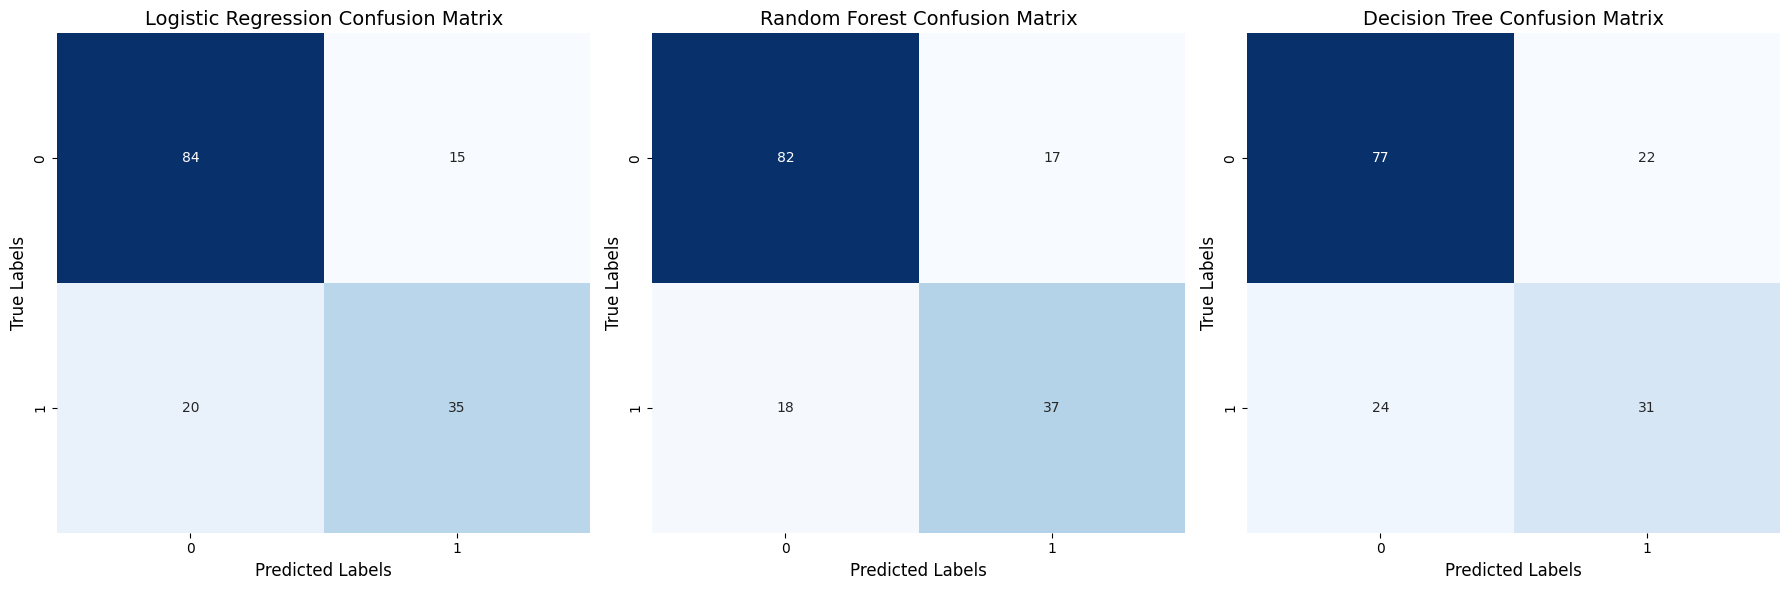

In [56]:
# 15.6
# Confusion Matrix

def plot_confusion_matrix_heatmap(model, model_name, test_X, test_Y, ax):
    # Get confusion matrix data
    cm = confusion_matrix(test_Y, model.predict(test_X))

    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    # cmap --> OrRd, magma, Blues

    # Set the title and labels
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=14)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)

    # Set x and y ticks
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

# Create subplots for the 3 models
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot confusion matrices for all three models
plot_confusion_matrix_heatmap(log_model, 'Logistic Regression', test_X, test_Y, axes[0])
plot_confusion_matrix_heatmap(rf_model, 'Random Forest', test_X, test_Y, axes[1])
plot_confusion_matrix_heatmap(dt_model, 'Decision Tree', test_X, test_Y, axes[2])

# Adjust layout
plt.tight_layout()

plt.show()

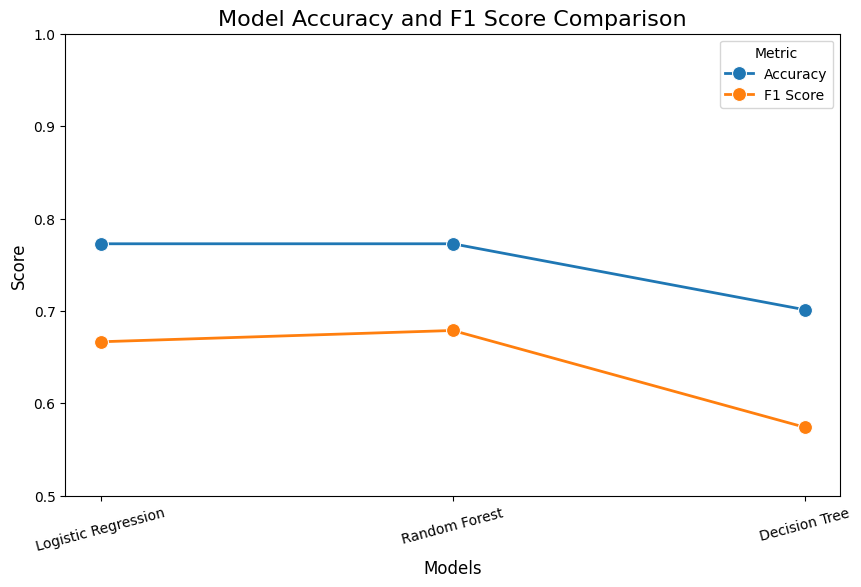

In [57]:
# 15.7
# สร้างกราฟเปรียบเทียบค่า accuracy และ f1-score

log_f1 = f1_score(test_Y, log_model.predict(test_X))
rf_f1 = f1_score(test_Y, rf_model.predict(test_X))
dt_f1 = f1_score(test_Y, dt_model.predict(test_X))

data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [log_accuracy, rf_accuracy, dt_accuracy],
    'F1 Score': [log_f1, rf_f1, dt_f1]
})

data_melted = pd.melt(data, id_vars='Model', value_vars=['Accuracy', 'F1 Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Score', hue='Metric', data=data_melted, marker='o', linewidth=2, markersize=10)

plt.ylim(0.5, 1)
plt.title('Model Accuracy and F1 Score Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.show()

## **Using the Best Model for Prediction**

In [58]:
# 16.1

# Use the Random Forest model for final predictions
best_model = rf_model  # Random Forest selected
final_pred = best_model.predict(test_X)

# Evaluate final model
print(f"Final Model Accuracy: {accuracy_score(test_Y, final_pred)}")
print("Final Classification Report:\n", classification_report(test_Y, final_pred))

Final Model Accuracy: 0.7727272727272727
Final Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



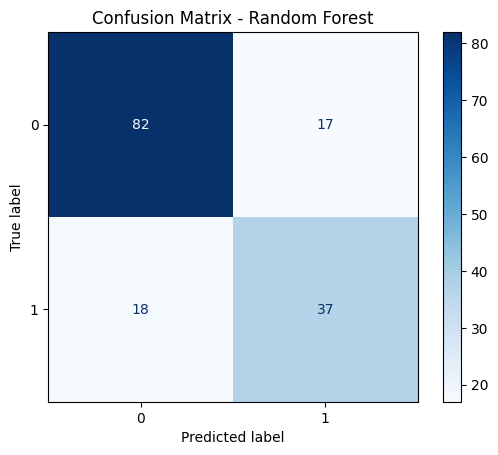

In [59]:
# 16.2

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for Random Forest (best model)
ConfusionMatrixDisplay.from_estimator(best_model, test_X, test_Y, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [70]:
# 16.3
# sample data
df.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_level,age_cat,age_gul_cat
100,1.0,163.0,72.0,29.0,125.000,39.0,1.200,33.0,1,Normal,mature,normal_mature
402,5.0,136.0,84.0,41.0,112.875,35.0,0.286,35.0,1,Normal,mature,normal_mature


In [71]:
# 16.4.1
# ลอง sample data เพื่อทดสอบ

y_pred = best_model.predict([[1.0, 163.0, 72.0, 29.0, 125.000, 39.0, 1.200, 33.0, None, None, None, None, None, None, None, None, None]])
print("Predicted outcome:", y_pred[0])

if y_pred == 1:
    print("Diabetic")
else:
    print("Non Diabetic")

Predicted outcome: 1
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
# 16.4.2
# ลอง sample data เพื่อทดสอบ

y_pred = best_model.predict([[5.0, 136.0, 84.0, 41.0, 112.875, 35.0, 0.286, 35.0, None, None, None, None, None, None, None, None, None]])
print("Predicted outcome:", y_pred[0])

if y_pred == 1:
    print("Diabetic")
else:
    print("Non Diabetic")

Predicted outcome: 1
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
